# Activity 1

## Installing libraries and import dataset

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:
raw_data=pd.read_csv("loan.csv")

In [36]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the loan data

In [38]:
raw_data.shape

(20000, 142)

In [40]:
raw_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv            int64
                          ...   
settlement_status        float64
settlement_date          float64
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 142, dtype: object

In [42]:
raw_data['loan_amnt'].describe()

count    20000.000000
mean     16111.383750
std      10369.193761
min       1000.000000
25%       8000.000000
50%      14000.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

## Removing irrelevant columns

In [19]:
raw_data= raw_data.drop(['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d',
'verification_status', 'pymnt_plan', 'funded_amnt_inv', 'sub_grade', 'out_prncp',
'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt', 'initial_list_status'], axis =1)

In [44]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Dealing with missing values

In [30]:
col_num=0
TotalObjects = raw_data.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in raw_data:
    nullCount = raw_data[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 20 :
        col_num=col_num+1
        raw_data.drop(x, axis=1,inplace=True)
        print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%
id					 100.0
member_id					 100.0
url					 100.0
desc					 100.0
mths_since_last_delinq					 56.375
mths_since_last_record					 88.41
mths_since_last_major_derog					 77.47
annual_inc_joint					 87.845
dti_joint					 87.845
verification_status_joint					 89.17
mths_since_recent_bc_dlq					 80.36
mths_since_recent_revol_delinq					 71.3
revol_bal_joint					 87.845
sec_app_earliest_cr_line					 87.845
sec_app_inq_last_6mths					 87.845
sec_app_mort_acc					 87.845
sec_app_open_acc					 87.845
sec_app_revol_util					 88.0
sec_app_open_act_il					 87.845
sec_app_num_rev_accts					 87.845
sec_app_chargeoff_within_12_mths					 87.845
sec_app_collections_12_mths_ex_med					 87.845
sec_app_mths_since_last_major_derog					 96.295
hardship_type					 100.0
hardship_reason					 100.0
hardship_status					 100.0
deferral_term					 100.0
hardship_amount					 100.0
hardship_start_date					 100.0
hardship_end_date					 100.0
payment_plan_start_date					 100.0
hardship_length		

In [32]:
raw_data['emp_title'].fillna('Unknown',inplace = True)
raw_data['dti'].fillna(0,inplace=True)
raw_data['revol_util'].fillna(raw_data['revol_util'].mean(),inplace = True)

/var/folders/zr/98nrgt552zx4l8w1f3bs9jx40000gn/T/ipykernel_34152/3868694636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['emp_title'].fillna('Unknown',inplace = True)
/var/folders/zr/98nrgt552zx4l8w1f3bs9jx40000gn/T/ipykernel_34152/3868694636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [58]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
raw_data['next_pymnt_d'].fillna('Completed',inplace = True)

In [82]:
raw_data['mths_since_rcnt_il'].fillna(0,inplace = True)
raw_data['mo_sin_old_il_acct'].fillna(0,inplace=True)
raw_data['bc_open_to_buy'].fillna(0,inplace=True)
raw_data['num_tl_120dpd_2m'].fillna(0,inplace=True)
raw_data['bc_util'].fillna(0,inplace=True)
raw_data['percent_bc_gt_75'].fillna(0,inplace=True)

/var/folders/zr/98nrgt552zx4l8w1f3bs9jx40000gn/T/ipykernel_34152/1919921571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['mths_since_rcnt_il'].fillna(0,inplace = True)
/var/folders/zr/98nrgt552zx4l8w1f3bs9jx40000gn/T/ipykernel_34152/1919921571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [86]:
raw_data['all_util'].fillna(raw_data['all_util'].mean(),inplace = True)
raw_data['avg_cur_bal'].fillna(raw_data['avg_cur_bal'].mean(),inplace = True)

/var/folders/zr/98nrgt552zx4l8w1f3bs9jx40000gn/T/ipykernel_34152/2581724249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['all_util'].fillna(raw_data['all_util'].mean(),inplace = True)
/var/folders/zr/98nrgt552zx4l8w1f3bs9jx40000gn/T/ipykernel_34152/2581724249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [113]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed


## Formatting data

In [90]:
pd.unique(raw_data['emp_length'].values)

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [92]:
def CalculateEmployeeLength(year):
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years':
        return 10
    else:
        yr=str(year)
        return yr.rstrip(' years')

In [94]:
raw_data['emp_length']=raw_data['emp_length'].apply(CalculateEmployeeLength)

In [96]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed


## Visualizing data

In [103]:
def CalculateLoanRanges(value):
    if value <= 5000:
        return '5K and Below'
    if value > 5000 and value <= 10000:
        return '5K-10K'
    if value > 10000 and value <= 15000:
        return '10K-15K'
    if value > 15000 and value <= 20000:
        return '15K-20K'
    if value > 20000 and value <= 25000:
        return '20K-25K'
    if value > 25000 and value <= 30000:
        return '25K-30K'
    if value > 30000 :
        return '30K and Above'
    return 'Other'

In [105]:
loan_ranges = raw_data['loan_amnt'].apply(CalculateLoanRanges)

In [107]:
loan_ranges.value_counts()

loan_amnt
5K-10K           5063
10K-15K          3472
15K-20K          3118
5K and Below     2898
30K and Above    2268
20K-25K          1834
25K-30K          1347
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Loan Amount')

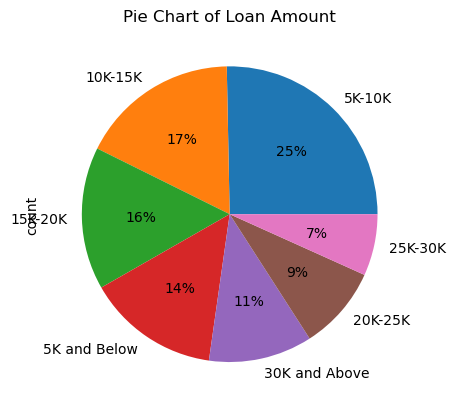

In [109]:
f = plt.figure()
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Loan Amount')

In [111]:
raw_data.to_csv('cleaned_loans2007.csv', index=False,encoding='utf-8')

In [115]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,fixed
